# The Spark Foundation Gratuate Rotational Intership Program
# GRIP :- Data Science and Business Analytics
## Task 1 :- Prediction using Supervised Machine Learning
## Objective :- Predict the Percentage of Student based on the number of study hours
### Performed by :- Ganesh Tamhane


# Import Libraries


import pandas as pd  ## for read the file
import numpy as np  # for calculations
import seaborn as sns   # for show the graph
import matplotlib.pyplot as plt  ##
import warnings  
warnings.filterwarnings("ignore")  # For Ignore the warnings

# Import Data 

In [2]:
#Import the data
url = "http://bit.ly/w-data"
Data = pd.read_csv(url)
Data   #Show the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Type


In [3]:
# Check the information about data
Data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Describe the about data
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# EDA 

### Checking Missing Value

In [5]:
# Check the missing value if present then Replace it
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

* There is no any found the missing value

### Checking Outlier 

<AxesSubplot:>

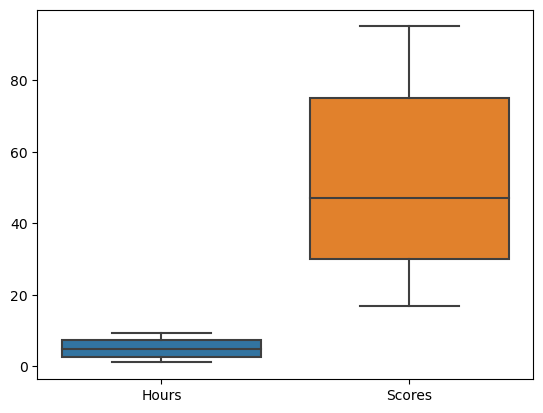

In [6]:
# Check the outlier is present or not
sns.boxplot(data = Data)

* There is no outlier present, so we do not treatment it

# Data Partition 

#### Split the data in to two parts  

In [7]:
#CHeck the data 
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# Putting feature variable to X
X = Data.drop('Hours', axis= 1)

# Putting response variable to y
y = Data[['Hours']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=100)

In [9]:
#Combine the data
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Hours,Scores
6,9.2,88
12,4.5,41
4,3.5,30
24,7.8,86
0,2.5,21


## Correlation Matrix 

In [10]:
np.round(df.corr(),2)   #Check the matrix

,Hours,Scores
Hours,1.00,0.98
Scores,0.98,1.00


<AxesSubplot:>

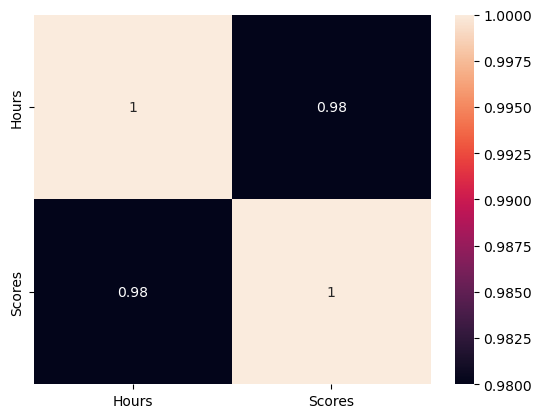

In [11]:
sns.heatmap(np.round(df.corr(),2),annot = True)    #Show the matrix using Heatmap

In [12]:
X1=df.drop(['Hours','Scores'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Series([], dtype: float64)

In [13]:
import statsmodels.formula.api as smf
model = smf.ols('Hours ~ Scores ',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Hours   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.15e-11
Time:                        11:45:24   Log-Likelihood:                -13.973
No. Observations:                  17   AIC:                             31.95
Df Residuals:                      15   BIC:                             33.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0798      0.316      0.253      0.804      -0.593       0.753
Scores         0.0970      0.005     18.288      0.000       0.086       0.108
==============================================================================
Omnibus:                        2.862   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                1.423
Skew:                           0.371   Prob(JB):                        0.491
Kurtosis:                       1.793   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df['fitted_value']=model.fittedvalues #Predicted Value
df['residual']=model.resid  #Error
df.head()

,Hours,Scores,fitted_value,residual
6,9.2,88,8.611473,0.588527
12,4.5,41,4.054772,0.445228
4,3.5,30,2.988310,0.511690
24,7.8,86,8.417571,-0.617571
0,2.5,21,2.115750,0.384250


<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

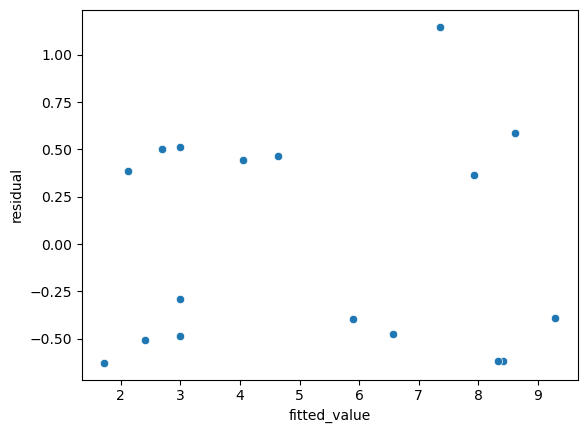

In [15]:
sns.scatterplot(x='fitted_value', y='residual',data=df)  #show the graph  

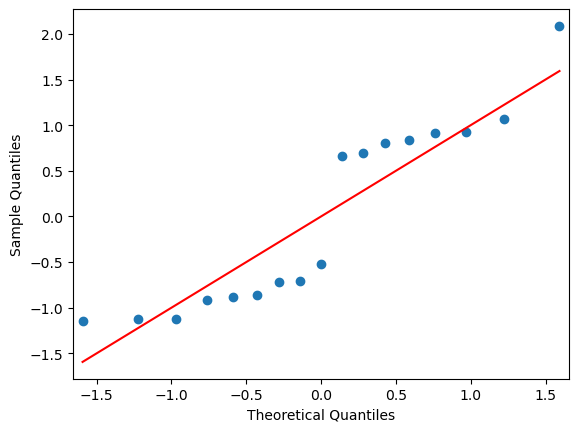

In [16]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
fig.show()

<AxesSubplot:ylabel='Frequency'>

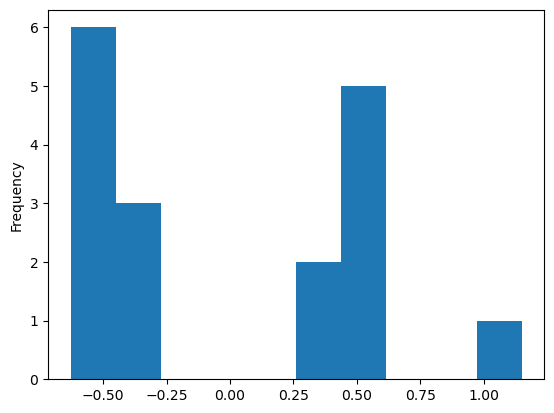

In [17]:
df['residual'].plot.hist()   #Show the Histogram 

In [18]:
df_test=pd.concat([X_test,y_test],axis=1)  # Concate the two test 

df_test.head()

,Scores,Hours
9,25,2.7
22,35,3.8
13,42,3.3
11,62,5.9
5,20,1.5


In [19]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Scores,Hours,Prediction
9,25,2.7,2.503554
22,35,3.8,3.473065
13,42,3.3,4.151723
11,62,5.9,6.090745
5,20,1.5,2.018799


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.93


### Conclusion

The Accuracy of model is 91%, the model is Good fit which is actually grates code for this model.